In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as mp
import seaborn as sns
import itertools

N_files = 45

find_numbers = lambda string: re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", string)
find_value = lambda string: float(find_numbers(string)[-1])

In [3]:
f = open("out/log_1.txt")

for i, x in enumerate(f):
    print(i,x)

0 ROOT_prompt_2:1:33: warning: ISO C++11 does not allow conversion from string literal to 'char *' [-Wwritable-strings]

1 SNN_Tracking(100000, 1, 10, 10, "/lustre/cmsdata/SNN_group/100k_100br.root", 1, 1e-09, 2.5e-10, 1.68e-09, 1.68e-09, 0.03125, 0.02656, 1, 1, 1, 0.7, 35, 35);

2                                 ^

3 

4 

5                                  ------------------------------------

6 

7                                     S   N   N      T r a c k i n g

8 

9                                  ------------------------------------

10 

11 

12 

13 

14          ------------------------------------------------------------------------------------    

15          Unsupervised search for tracks in 8-layer strip detector with spiking neural network    

16                                                                              T.Dorigo, 3/2023    

17          ------------------------------------------------------------------------------------    

18 

19          Run p

In [4]:
#efficiency  -> line 65
#fake rate   -> line 66
#Q value     -> line 67
#selectivity -> line 68

metrics_list = []

for i in range(N_files):
    f = open(f"out/log_{i}.txt")
    log_lines = f.readlines()
    
    efficiency  = find_value(log_lines[65])
    fkrate      = find_value(log_lines[66])
    Qvalue      = find_value(log_lines[67])
    selectivity = find_value(log_lines[68])
    
    metrics = (efficiency, fkrate, Qvalue, selectivity)
    #print(i, *metrics)

    metrics_list.append((i, efficiency, fkrate, Qvalue, selectivity))

print("Selectivity maximum: ")
print(max([line[-1] for line in metrics_list]))

Selectivity maximum: 
0.550877


    PK  Efficiency  Fake Rate  Q value  Selectivity
0    0    0.958283     0.0362  6.34906     0.412728
1    1    0.958283     0.0362  6.41203     0.424577
2    2    0.958283     0.0360  6.44328     0.429919
3    3    0.958283     0.0364  7.06031     0.547172
4    4    0.958086     0.0358  7.08012     0.549205
5    5    0.957883     0.0360  7.08504     0.550877
6    6    0.854627     0.0146  6.50739     0.461003
7    7    0.854621     0.0142  6.50823     0.459181
8    8    0.854421     0.0140  6.50337     0.457608
9    9    0.958480     0.0362  6.81287     0.499883
10  10    0.958283     0.0362  6.83733     0.504610
11  11    0.958283     0.0360  6.85423     0.507206
12  12    0.945513     0.0304  6.90387     0.505967
13  13    0.945513     0.0302  6.89395     0.503414
14  14    0.945513     0.0302  6.88920     0.502529
15  15    0.843596     0.0118  6.08627     0.385239
16  16    0.843405     0.0114  6.08733     0.383819
17  17    0.843203     0.0114  6.08004     0.382750
18  18    0.

<Axes: xlabel='PK', ylabel='Selectivity'>

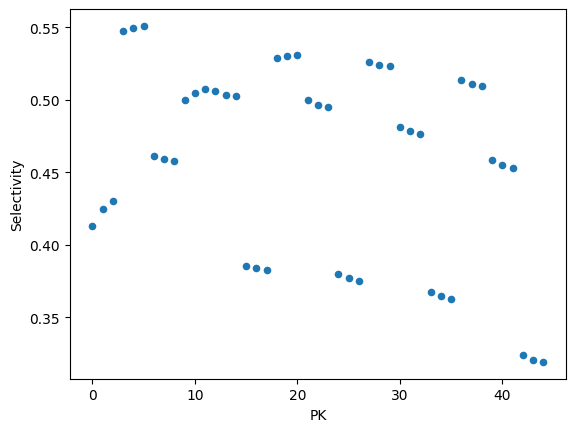

In [5]:
#creating a pandas dataframe:
df = pd.DataFrame(metrics_list, columns =['PK', 'Efficiency', 'Fake Rate', 'Q value', 'Selectivity'])
print(df)
df.plot(x="PK", y="Selectivity", kind="scatter")


In [6]:
#creating a pandas dataframe with the combinations

NL0_list =          [10, 15, 20, 25, 30]       
CFI0_list =         [1, 0.8, 0.6] 
a_list =            [0.5, 0.7, 0.9]      #alfa parameter -> inhibition strength

parameters_list = (NL0_list, CFI0_list, a_list)

all_combinations = itertools.product(*parameters_list)

combo_list = [(i, *combination) for i, combination in enumerate(all_combinations)]

combo_df = pd.DataFrame(combo_list, columns=["PK","N", "CF", "alfa"])
print(combo_df)

    PK   N   CF  alfa
0    0  10  1.0   0.5
1    1  10  1.0   0.7
2    2  10  1.0   0.9
3    3  10  0.8   0.5
4    4  10  0.8   0.7
5    5  10  0.8   0.9
6    6  10  0.6   0.5
7    7  10  0.6   0.7
8    8  10  0.6   0.9
9    9  15  1.0   0.5
10  10  15  1.0   0.7
11  11  15  1.0   0.9
12  12  15  0.8   0.5
13  13  15  0.8   0.7
14  14  15  0.8   0.9
15  15  15  0.6   0.5
16  16  15  0.6   0.7
17  17  15  0.6   0.9
18  18  20  1.0   0.5
19  19  20  1.0   0.7
20  20  20  1.0   0.9
21  21  20  0.8   0.5
22  22  20  0.8   0.7
23  23  20  0.8   0.9
24  24  20  0.6   0.5
25  25  20  0.6   0.7
26  26  20  0.6   0.9
27  27  25  1.0   0.5
28  28  25  1.0   0.7
29  29  25  1.0   0.9
30  30  25  0.8   0.5
31  31  25  0.8   0.7
32  32  25  0.8   0.9
33  33  25  0.6   0.5
34  34  25  0.6   0.7
35  35  25  0.6   0.9
36  36  30  1.0   0.5
37  37  30  1.0   0.7
38  38  30  1.0   0.9
39  39  30  0.8   0.5
40  40  30  0.8   0.7
41  41  30  0.8   0.9
42  42  30  0.6   0.5
43  43  30  0.6   0.7
44  44  30

In [7]:
#inner join using PK field
join_df = df.join(combo_df.set_index("PK"), on="PK")
print (join_df)

    PK  Efficiency  Fake Rate  Q value  Selectivity   N   CF  alfa
0    0    0.958283     0.0362  6.34906     0.412728  10  1.0   0.5
1    1    0.958283     0.0362  6.41203     0.424577  10  1.0   0.7
2    2    0.958283     0.0360  6.44328     0.429919  10  1.0   0.9
3    3    0.958283     0.0364  7.06031     0.547172  10  0.8   0.5
4    4    0.958086     0.0358  7.08012     0.549205  10  0.8   0.7
5    5    0.957883     0.0360  7.08504     0.550877  10  0.8   0.9
6    6    0.854627     0.0146  6.50739     0.461003  10  0.6   0.5
7    7    0.854621     0.0142  6.50823     0.459181  10  0.6   0.7
8    8    0.854421     0.0140  6.50337     0.457608  10  0.6   0.9
9    9    0.958480     0.0362  6.81287     0.499883  15  1.0   0.5
10  10    0.958283     0.0362  6.83733     0.504610  15  1.0   0.7
11  11    0.958283     0.0360  6.85423     0.507206  15  1.0   0.9
12  12    0.945513     0.0304  6.90387     0.505967  15  0.8   0.5
13  13    0.945513     0.0302  6.89395     0.503414  15  0.8  

<Axes: xlabel='alfa-CF', ylabel='N'>

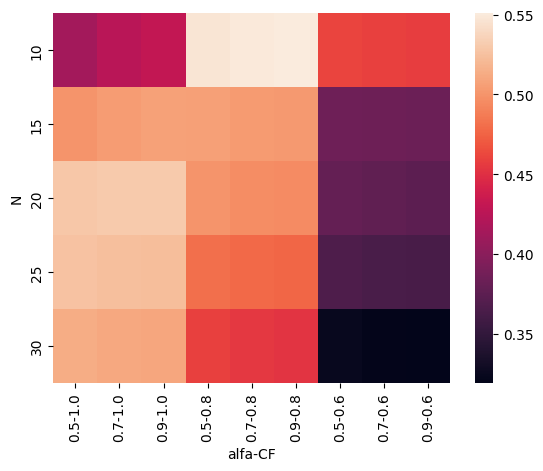

In [8]:
sns.heatmap(join_df.pivot(index="N", columns=["alfa", "CF"], values="Selectivity"))

<Axes: xlabel='CF-alfa', ylabel='N'>

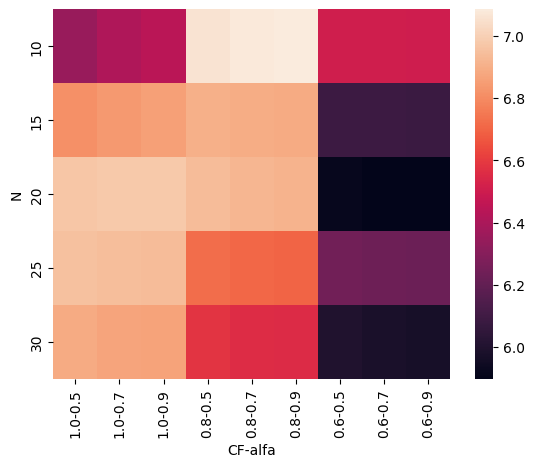

In [9]:
sns.heatmap(join_df.pivot(index="N", columns=["CF", "alfa"], values="Q value"))


<Axes: xlabel='CF-alfa', ylabel='N'>

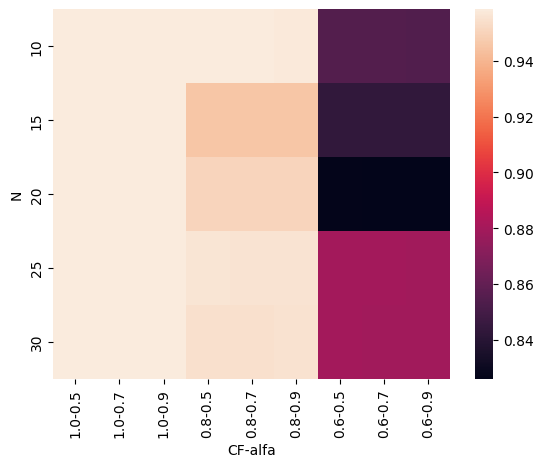

In [10]:
sns.heatmap(join_df.pivot(index="N", columns=["CF", "alfa"], values="Efficiency"))

<Axes: xlabel='CF-alfa', ylabel='N'>

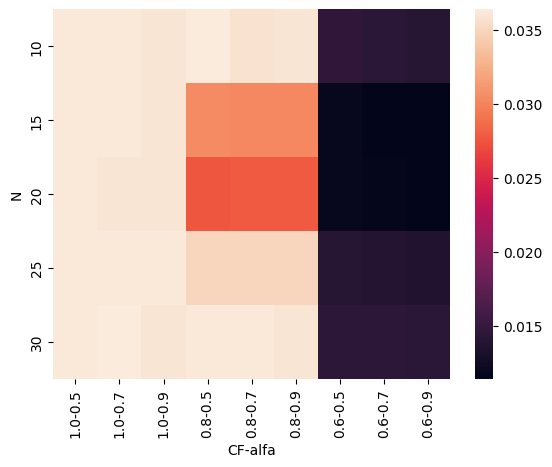

In [11]:
sns.heatmap(join_df.pivot(index="N", columns=["CF", "alfa"], values="Fake Rate"))